# 📊 Análisis Exploratorio de Datos (EDA)
## Proyecto: Pipeline NLP para Análisis de Twitter

**Fecha:** Octubre 2025  
**Dataset:** Twitter_Data.csv
 
---

## 📋 Objetivos del EDA
 
1. **Comprensión del Dataset**: Estructura, dimensiones y tipos de datos
2. **Análisis de Calidad**: Valores nulos, duplicados y consistencia
3. **Distribución de Clases**: Balance del dataset para clasificación
4. **Análisis Textual**: Longitud de tweets, vocabulario y patrones
5. **Visualizaciones**: Gráficas informativas para el informe
6. **Decisiones de Preprocesamiento**: Identificar necesidades de limpieza

# ---------
# Configuracion Inicial
# --------

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import re
from collections import Counter
import string

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

np.random.seed(42)

print("✅ Librerías importadas correctamente")
print(f"📦 Versiones:")
print(f"   - pandas: {pd.__version__}")
print(f"   - numpy: {np.__version__}")

✅ Librerías importadas correctamente
📦 Versiones:
   - pandas: 2.3.1
   - numpy: 1.26.4


# -----
# Carga del Dataset
# -----

In [2]:
data_path = Path('../data/Twitter_Data.csv')

if not data_path.exists():
    print(f"❌ ERROR: El archivo {data_path} no existe")
    print(f"📁 Ruta actual: {Path.cwd()}")
else:
    df = pd.read_csv(data_path)
    print(f"✅ Dataset cargado exitosamente")
    print(f"📊 Dimensiones: {df.shape[0]:,} filas × {df.shape[1]} columnas")
    print(f"💾 Tamaño en memoria: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

✅ Dataset cargado exitosamente
📊 Dimensiones: 162,980 filas × 2 columnas
💾 Tamaño en memoria: 32.39 MB


# -----
# Inspeccion Incial
# -----

In [4]:
print("🔍 PRIMERAS 10 FILAS DEL DATASET")
print("=" * 100)
display(df.head(10))

print("\n🔍 ÚLTIMAS 5 FILAS DEL DATASET")
print("=" * 100)
display(df.tail())

print("\n📋 INFORMACIÓN GENERAL DEL DATASET")
print("=" * 100)
df.info()

print("\n📌 COLUMNAS DEL DATASET")
print("=" * 100)
for i, col in enumerate(df.columns, 1):
    dtype = df[col].dtype
    n_unique = df[col].nunique()
    print(f"  {i}. {col:30s} | Tipo: {str(dtype):10s} | Valores únicos: {n_unique:,}")

print("\n📊 ESTADÍSTICAS DESCRIPTIVAS")
print("=" * 100)
display(df.describe(include='all').T)

print("\n🔢 MUESTRA ALEATORIA (5 registros)")
print("=" * 100)
display(df.sample(5, random_state=42))

🔍 PRIMERAS 10 FILAS DEL DATASET


,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
5,kiya tho refresh maarkefir comment karo,0.0
6,surat women perform yagna seeks divine grace f...,0.0
7,this comes from cabinet which has scholars lik...,0.0
8,with upcoming election india saga going import...,1.0
9,gandhi was gay does modi,1.0



🔍 ÚLTIMAS 5 FILAS DEL DATASET


,clean_text,category
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0
162979,have you ever listen about like gurukul where ...,1.0



📋 INFORMACIÓN GENERAL DEL DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB

📌 COLUMNAS DEL DATASET
  1. clean_text                     | Tipo: object     | Valores únicos: 162,976
  2. category                       | Tipo: float64    | Valores únicos: 3

📊 ESTADÍSTICAS DESCRIPTIVAS


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
clean_text,162976,162976,when modi promised “minimum government maximum...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category,162973.0,NaN,NaN,NaN,0.225436,0.781279,-1.0,0.0,0.0,1.0,1.0



🔢 MUESTRA ALEATORIA (5 registros)


,clean_text,category
45849,sir also staunch modi supporter but you should...,0.0
131657,aloo factory productions,0.0
65437,because they are pigs who were born raised lut...,1.0
41980,indian modi plans national broadcast wednesday\n,0.0
39625,narendra modi spearhead bjps election campaign...,0.0


# -----
# Analisis de Calidad de Datos
# -----

🔍 ANÁLISIS DE VALORES NULOS


,Columna,Valores Nulos,Porcentaje
1,category,7,0.004295
0,clean_text,4,0.002454



⚠️  Total de valores nulos: 11


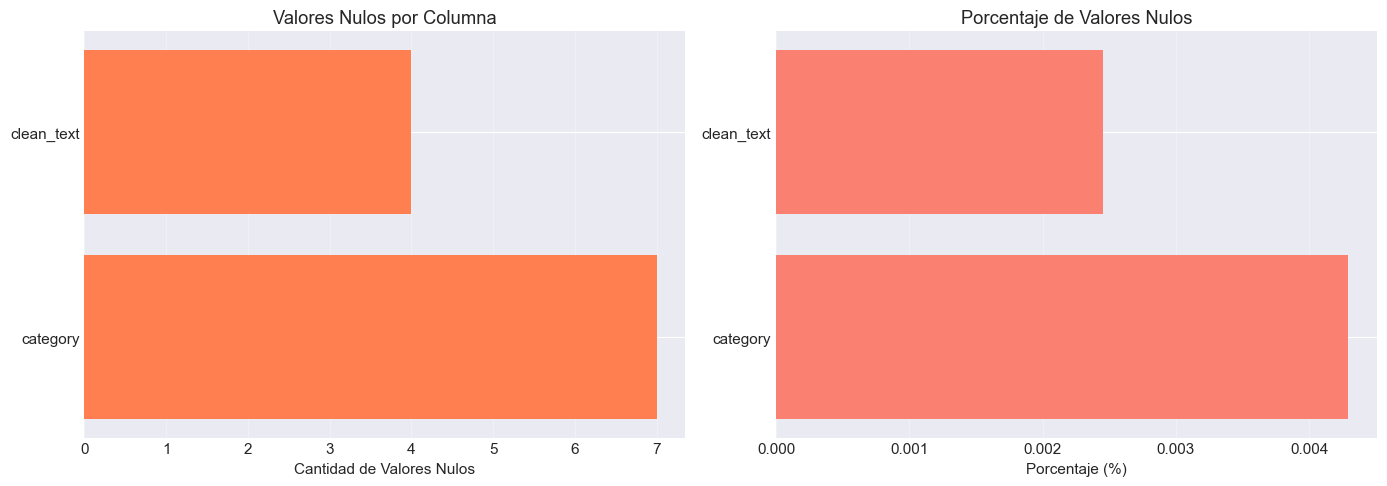

In [6]:
# 4.1 Valores Nulos y Faltantes

null_counts = df.isnull().sum()
null_percentages = (df.isnull().sum() / len(df)) * 100

null_df = pd.DataFrame({
    'Columna': null_counts.index,
    'Valores Nulos': null_counts.values,
    'Porcentaje': null_percentages.values
}).sort_values('Valores Nulos', ascending=False)

print("🔍 ANÁLISIS DE VALORES NULOS")
print("=" * 100)
display(null_df)

if null_df['Valores Nulos'].sum() > 0:
    print(f"\n⚠️  Total de valores nulos: {null_df['Valores Nulos'].sum():,}")
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    null_cols = null_df[null_df['Valores Nulos'] > 0]
    if len(null_cols) > 0:
        axes[0].barh(null_cols['Columna'], null_cols['Valores Nulos'], color='coral')
        axes[0].set_xlabel('Cantidad de Valores Nulos')
        axes[0].set_title('Valores Nulos por Columna')
        axes[0].grid(True, alpha=0.3, axis='x')
        
        axes[1].barh(null_cols['Columna'], null_cols['Porcentaje'], color='salmon')
        axes[1].set_xlabel('Porcentaje (%)')
        axes[1].set_title('Porcentaje de Valores Nulos')
        axes[1].grid(True, alpha=0.3, axis='x')
    
    plt.tight_layout()
    plt.savefig('../reports/figures/null_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()
else:
    print("✅ No hay valores nulos en el dataset")

In [7]:
# 4.2 Valores Duplicados

duplicates = df.duplicated().sum()
duplicate_percentage = (duplicates / len(df)) * 100

print("🔍 ANÁLISIS DE DUPLICADOS")
print("=" * 100)
print(f"Total de filas duplicadas: {duplicates:,}")
print(f"Porcentaje: {duplicate_percentage:.2f}%")

if duplicates > 0:
    print(f"\n⚠️  Se encontraron {duplicates:,} filas duplicadas")
    print("📝 Acción recomendada: Eliminar duplicados durante preprocesamiento")
    
    print("\n🔍 Ejemplo de filas duplicadas:")
    display(df[df.duplicated(keep=False)].head(4))
else:
    print("✅ No hay filas duplicadas en el dataset")

🔍 ANÁLISIS DE DUPLICADOS
Total de filas duplicadas: 1
Porcentaje: 0.00%

⚠️  Se encontraron 1 filas duplicadas
📝 Acción recomendada: Eliminar duplicados durante preprocesamiento

🔍 Ejemplo de filas duplicadas:


,clean_text,category
148,NaN,0.0
159443,NaN,0.0


📊 DISTRIBUCIÓN DE TIPOS DE DATOS
  object: 1 columna(s)
  float64: 1 columna(s)


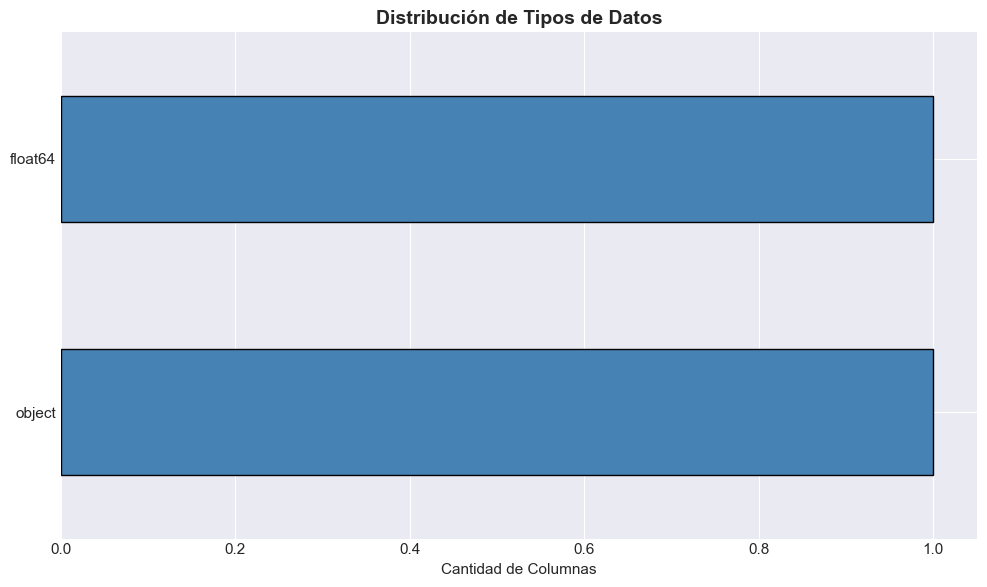

In [8]:
# 4.3 Tipos de Datos

dtype_counts = df.dtypes.value_counts()

print("📊 DISTRIBUCIÓN DE TIPOS DE DATOS")
print("=" * 100)
for dtype, count in dtype_counts.items():
    print(f"  {dtype}: {count} columna(s)")

plt.figure(figsize=(10, 6))
dtype_counts.plot(kind='barh', color='steelblue', edgecolor='black')
plt.xlabel('Cantidad de Columnas')
plt.title('Distribución de Tipos de Datos', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('../reports/figures/data_types.png', dpi=300, bbox_inches='tight')
plt.show()

# -----
# Identificación de Columnas Principales
# -----

In [9]:
print("🔍 IDENTIFICACIÓN AUTOMÁTICA DE COLUMNAS")
print("=" * 100)

# Identificar columna de texto
text_candidates = []
for col in df.columns:
    if df[col].dtype == 'object':
        sample_text = df[col].dropna().astype(str).iloc[0] if len(df[col].dropna()) > 0 else ""
        avg_length = df[col].dropna().astype(str).str.len().mean()
        if avg_length > 20:
            text_candidates.append((col, avg_length))

print("\n📝 Candidatos para columna de TEXTO:")
for col, avg_len in sorted(text_candidates, key=lambda x: x[1], reverse=True):
    print(f"  - {col:30s} (longitud promedio: {avg_len:.1f} caracteres)")

# Identificar columna de etiquetas
label_candidates = []
for col in df.columns:
    n_unique = df[col].nunique()
    if n_unique < 20 and n_unique > 1:
        label_candidates.append((col, n_unique))

print("\n🏷️  Candidatos para columna de ETIQUETAS:")
for col, n_unique in sorted(label_candidates, key=lambda x: x[1]):
    print(f"  - {col:30s} ({n_unique} valores únicos)")

# Selección automática
if text_candidates:
    text_column = text_candidates[0][0]
    print(f"\n✅ Columna de TEXTO seleccionada: '{text_column}'")
else:
    print("\n⚠️  No se pudo identificar automáticamente la columna de texto")
    text_column = input("Por favor ingresa el nombre de la columna de texto: ")

if label_candidates:
    label_column = label_candidates[0][0]
    print(f"✅ Columna de ETIQUETAS seleccionada: '{label_column}'")
else:
    print("\n⚠️  No se pudo identificar automáticamente la columna de etiquetas")
    label_column = input("Por favor ingresa el nombre de la columna de etiquetas: ")

🔍 IDENTIFICACIÓN AUTOMÁTICA DE COLUMNAS

📝 Candidatos para columna de TEXTO:
  - clean_text                     (longitud promedio: 124.2 caracteres)

🏷️  Candidatos para columna de ETIQUETAS:
  - category                       (3 valores únicos)

✅ Columna de TEXTO seleccionada: 'clean_text'
✅ Columna de ETIQUETAS seleccionada: 'category'


# -----
# Análisis de la Columna de Texto
# -----

In [10]:
print(f"📝 ANÁLISIS DE LA COLUMNA: '{text_column}'")
print("=" * 100)

# Crear copia limpia
df_clean = df[df[text_column].notna()].copy()
print(f"Registros válidos: {len(df_clean):,} (eliminados {len(df) - len(df_clean):,} nulos)")

# Calcular métricas
df_clean['text_length'] = df_clean[text_column].astype(str).str.len()
df_clean['word_count'] = df_clean[text_column].astype(str).str.split().str.len()
df_clean['char_count_no_spaces'] = df_clean[text_column].astype(str).str.replace(' ', '').str.len()

print("\n📊 ESTADÍSTICAS DE TEXTO:")
stats_df = df_clean[['text_length', 'word_count', 'char_count_no_spaces']].describe()
stats_df.index = ['count', 'media', 'desv_std', 'min', '25%', '50% (mediana)', '75%', 'max']
display(stats_df.T)

📝 ANÁLISIS DE LA COLUMNA: 'clean_text'
Registros válidos: 162,976 (eliminados 4 nulos)

📊 ESTADÍSTICAS DE TEXTO:


,count,media,desv_std,min,25%,50% (mediana),75%,max
text_length,162976.0,124.176492,67.923285,1.0,66.0,114.0,183.0,274.0
word_count,162976.0,20.080417,10.879498,0.0,11.0,18.0,29.0,52.0
char_count_no_spaces,162976.0,104.713056,57.434956,0.0,56.0,96.0,154.0,249.0


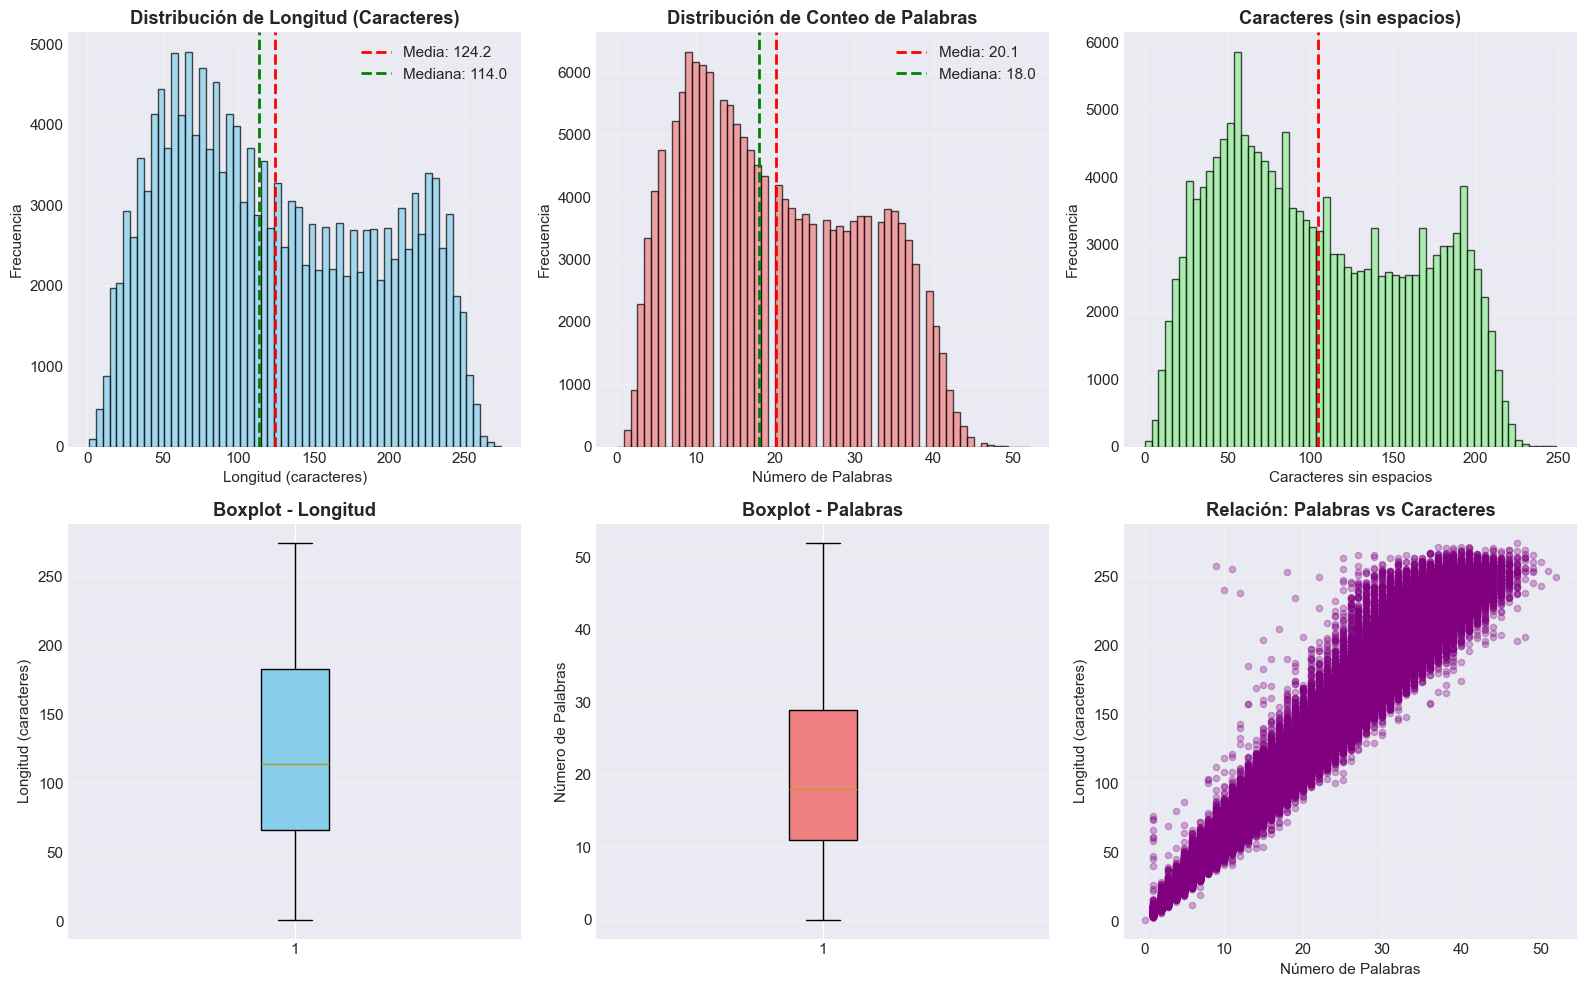

In [11]:
# 6.1 Distribuciones de Longitud

# %%
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# Histograma de longitud de caracteres
axes[0, 0].hist(df_clean['text_length'], bins=60, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].axvline(df_clean['text_length'].mean(), color='red', linestyle='--', linewidth=2,
                   label=f'Media: {df_clean["text_length"].mean():.1f}')
axes[0, 0].axvline(df_clean['text_length'].median(), color='green', linestyle='--', linewidth=2,
                   label=f'Mediana: {df_clean["text_length"].median():.1f}')
axes[0, 0].set_xlabel('Longitud (caracteres)')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].set_title('Distribución de Longitud (Caracteres)', fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Histograma de palabras
axes[0, 1].hist(df_clean['word_count'], bins=60, color='lightcoral', edgecolor='black', alpha=0.7)
axes[0, 1].axvline(df_clean['word_count'].mean(), color='red', linestyle='--', linewidth=2,
                   label=f'Media: {df_clean["word_count"].mean():.1f}')
axes[0, 1].axvline(df_clean['word_count'].median(), color='green', linestyle='--', linewidth=2,
                   label=f'Mediana: {df_clean["word_count"].median():.1f}')
axes[0, 1].set_xlabel('Número de Palabras')
axes[0, 1].set_ylabel('Frecuencia')
axes[0, 1].set_title('Distribución de Conteo de Palabras', fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Caracteres sin espacios
axes[0, 2].hist(df_clean['char_count_no_spaces'], bins=60, color='lightgreen', edgecolor='black', alpha=0.7)
axes[0, 2].axvline(df_clean['char_count_no_spaces'].mean(), color='red', linestyle='--', linewidth=2)
axes[0, 2].set_xlabel('Caracteres sin espacios')
axes[0, 2].set_ylabel('Frecuencia')
axes[0, 2].set_title('Caracteres (sin espacios)', fontweight='bold')
axes[0, 2].grid(True, alpha=0.3)

# Boxplot de caracteres
bp1 = axes[1, 0].boxplot(df_clean['text_length'], vert=True, patch_artist=True)
bp1['boxes'][0].set_facecolor('skyblue')
axes[1, 0].set_ylabel('Longitud (caracteres)')
axes[1, 0].set_title('Boxplot - Longitud', fontweight='bold')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Boxplot de palabras
bp2 = axes[1, 1].boxplot(df_clean['word_count'], vert=True, patch_artist=True)
bp2['boxes'][0].set_facecolor('lightcoral')
axes[1, 1].set_ylabel('Número de Palabras')
axes[1, 1].set_title('Boxplot - Palabras', fontweight='bold')
axes[1, 1].grid(True, alpha=0.3, axis='y')

# Scatter plot: longitud vs palabras
axes[1, 2].scatter(df_clean['word_count'], df_clean['text_length'], alpha=0.3, s=20, color='purple')
axes[1, 2].set_xlabel('Número de Palabras')
axes[1, 2].set_ylabel('Longitud (caracteres)')
axes[1, 2].set_title('Relación: Palabras vs Caracteres', fontweight='bold')
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../reports/figures/text_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

In [12]:
# 6.2 Ejemplos de Textos

# %%
print("📝 EJEMPLOS DE TEXTOS DEL DATASET")
print("=" * 100)

sample_indices = [0, len(df_clean)//4, len(df_clean)//2, 3*len(df_clean)//4, len(df_clean)-1]

for i, idx in enumerate(sample_indices, 1):
    text = df_clean.iloc[idx][text_column]
    length = df_clean.iloc[idx]['text_length']
    words = df_clean.iloc[idx]['word_count']
    print(f"\n📄 Ejemplo {i} (chars: {length}, words: {words}):")
    print(f"   {text}")
    print("-" * 100)

📝 EJEMPLOS DE TEXTOS DEL DATASET

📄 Ejemplo 1 (chars: 210, words: 33):
   when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples
----------------------------------------------------------------------------------------------------

📄 Ejemplo 2 (chars: 125, words: 19):
   prime minister narendra modi will address the nation shortly two weeks ahead the commencement polling the country read story 
----------------------------------------------------------------------------------------------------

📄 Ejemplo 3 (chars: 196, words: 33):
   yaa coz none the bjp leaders houses are being raidedwhy not them they have not done anything wrongwhy department wanys only comgress and non bjp party memebersthats the reason its credit goes modi
----------------------------------------------------------------------------------------------------

📄 Ejem

# -----
# Análisis de Patrones en el Texto
# -----

In [13]:
print("🔍 ANÁLISIS DE PATRONES Y ELEMENTOS ESPECIALES")
print("=" * 100)

def analyze_patterns(text):
    text_str = str(text)
    return {
        'urls': len(re.findall(r'http\S+|www\.\S+', text_str)),
        'mentions': len(re.findall(r'@\w+', text_str)),
        'hashtags': len(re.findall(r'#\w+', text_str)),
        'numbers': len(re.findall(r'\b\d+\b', text_str)),
        'punctuation': sum(1 for c in text_str if c in string.punctuation),
        'uppercase_words': len(re.findall(r'\b[A-Z]{2,}\b', text_str)),
        'emojis': len(re.findall(r'[^\w\s,.]', text_str))
    }

patterns = df_clean[text_column].apply(analyze_patterns)
pattern_df = pd.DataFrame(patterns.tolist())

print("\n📊 ESTADÍSTICAS DE ELEMENTOS ESPECIALES:")
display(pattern_df.describe().T)

print("\n📈 PORCENTAJE DE TEXTOS QUE CONTIENEN CADA ELEMENTO:")
for col in pattern_df.columns:
    pct = (pattern_df[col] > 0).mean() * 100
    count = (pattern_df[col] > 0).sum()
    avg = pattern_df[pattern_df[col] > 0][col].mean() if count > 0 else 0
    print(f"  {col.upper():20s}: {pct:5.1f}% ({count:,} textos) | Promedio cuando presente: {avg:.2f}")

🔍 ANÁLISIS DE PATRONES Y ELEMENTOS ESPECIALES

📊 ESTADÍSTICAS DE ELEMENTOS ESPECIALES:


,count,mean,std,min,25%,50%,75%,max
urls,162976.0,0.000172,0.013106,0.0,0.0,0.0,0.0,1.0
mentions,162976.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
hashtags,162976.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
numbers,162976.0,0.147249,0.517017,0.0,0.0,0.0,0.0,22.0
punctuation,162976.0,0.002405,0.077666,0.0,0.0,0.0,0.0,15.0
uppercase_words,162976.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
emojis,162976.0,0.271629,1.146210,0.0,0.0,0.0,0.0,90.0



📈 PORCENTAJE DE TEXTOS QUE CONTIENEN CADA ELEMENTO:
  URLS                :   0.0% (28 textos) | Promedio cuando presente: 1.00
  MENTIONS            :   0.0% (0 textos) | Promedio cuando presente: 0.00
  HASHTAGS            :   0.0% (0 textos) | Promedio cuando presente: 0.00
  NUMBERS             :  10.9% (17,817 textos) | Promedio cuando presente: 1.35
  PUNCTUATION         :   0.2% (290 textos) | Promedio cuando presente: 1.35
  UPPERCASE_WORDS     :   0.0% (0 textos) | Promedio cuando presente: 0.00
  EMOJIS              :  11.9% (19,374 textos) | Promedio cuando presente: 2.28


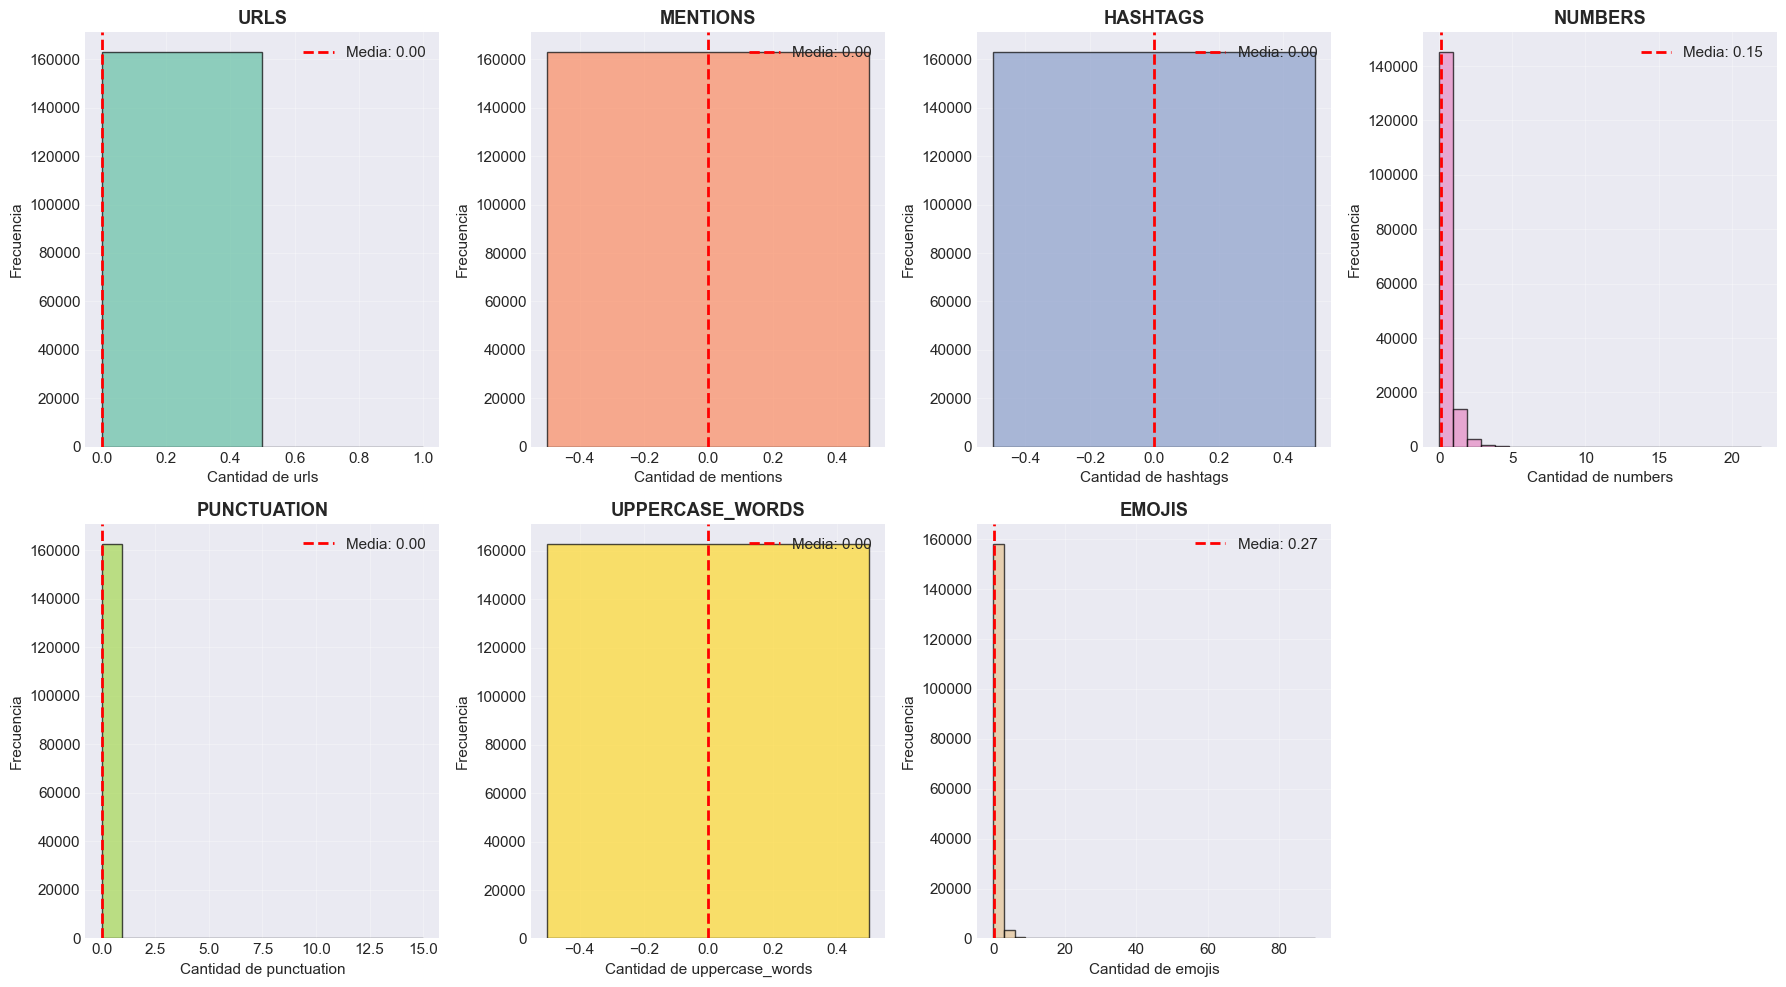

In [14]:
# 8.1 Visualización de Patrones

fig, axes = plt.subplots(2, 4, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(pattern_df.columns):
    if i < len(axes):
        data = pattern_df[col]
        axes[i].hist(data, bins=min(30, data.max() + 1), color=sns.color_palette("Set2")[i],
                     edgecolor='black', alpha=0.7)
        axes[i].set_xlabel(f'Cantidad de {col}')
        axes[i].set_ylabel('Frecuencia')
        axes[i].set_title(f'{col.upper()}', fontweight='bold')
        axes[i].grid(True, alpha=0.3)
        axes[i].axvline(data.mean(), color='red', linestyle='--', linewidth=2, label=f'Media: {data.mean():.2f}')
        axes[i].legend()

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.savefig('../reports/figures/text_patterns.png', dpi=300, bbox_inches='tight')
plt.show()

# -----
# Análisis de Vocabulario
# -----

In [15]:
print("📚 ANÁLISIS DE VOCABULARIO")
print("=" * 100)

def simple_tokenize(text):
    text = str(text).lower()
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'@\w+|#\w+', '', text)
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\d+', '', text)
    tokens = text.split()
    return [t for t in tokens if len(t) > 2]

all_tokens = []
for text in df_clean[text_column]:
    all_tokens.extend(simple_tokenize(text))

vocab_size = len(set(all_tokens))
total_words = len(all_tokens)
lexical_diversity = vocab_size / total_words if total_words > 0 else 0

print(f"\n📊 ESTADÍSTICAS GENERALES:")
print(f"  ├─ Total de palabras (tokens): {total_words:,}")
print(f"  ├─ Vocabulario (palabras únicas): {vocab_size:,}")
print(f"  ├─ Diversidad léxica: {lexical_diversity:.4f}")
print(f"  └─ Promedio de uso por palabra: {total_words / vocab_size:.2f} veces")

word_freq = Counter(all_tokens)
most_common = word_freq.most_common(40)

print(f"\n🔝 TOP 40 PALABRAS MÁS FRECUENTES:")
print("-" * 100)
for i, (word, count) in enumerate(most_common, 1):
    pct = (count / total_words) * 100
    bar = '█' * int(pct * 2)
    print(f"  {i:2d}. {word:20s} │ {count:6,} veces │ {pct:5.2f}% │ {bar}")

📚 ANÁLISIS DE VOCABULARIO

📊 ESTADÍSTICAS GENERALES:
  ├─ Total de palabras (tokens): 3,230,327
  ├─ Vocabulario (palabras únicas): 101,274
  ├─ Diversidad léxica: 0.0314
  └─ Promedio de uso por palabra: 31.90 veces

🔝 TOP 40 PALABRAS MÁS FRECUENTES:
----------------------------------------------------------------------------------------------------
   1. modi                 │ 155,659 veces │  4.82% │ █████████
   2. the                  │ 104,514 veces │  3.24% │ ██████
   3. and                  │ 67,372 veces │  2.09% │ ████
   4. for                  │ 52,455 veces │  1.62% │ ███
   5. you                  │ 38,991 veces │  1.21% │ ██
   6. not                  │ 29,350 veces │  0.91% │ █
   7. india                │ 29,189 veces │  0.90% │ █
   8. will                 │ 28,948 veces │  0.90% │ █
   9. this                 │ 28,618 veces │  0.89% │ █
  10. that                 │ 28,197 veces │  0.87% │ █
  11. are                  │ 27,999 veces │  0.87% │ █
  12. with           

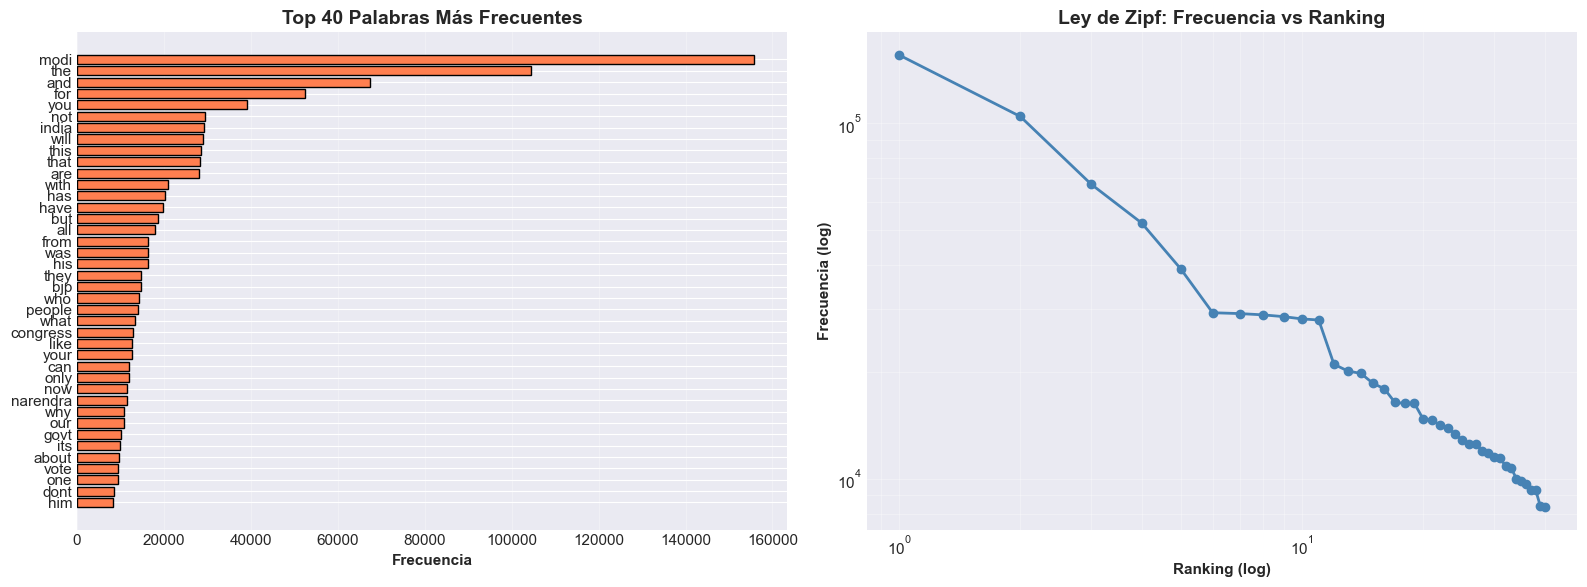

In [16]:
# 9.1 Visualización de Frecuencias

words, counts = zip(*most_common)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfica de barras horizontal
axes[0].barh(range(len(words)), counts, color='coral', edgecolor='black')
axes[0].set_yticks(range(len(words)))
axes[0].set_yticklabels(words)
axes[0].set_xlabel('Frecuencia', fontweight='bold')
axes[0].set_title('Top 40 Palabras Más Frecuentes', fontsize=14, fontweight='bold')
axes[0].invert_yaxis()
axes[0].grid(True, alpha=0.3, axis='x')

# Gráfica de Zipf (log-log)
ranks = np.arange(1, len(words) + 1)
axes[1].loglog(ranks, counts, 'o-', color='steelblue', markersize=6, linewidth=2)
axes[1].set_xlabel('Ranking (log)', fontweight='bold')
axes[1].set_ylabel('Frecuencia (log)', fontweight='bold')
axes[1].set_title("Ley de Zipf: Frecuencia vs Ranking", fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3, which='both')

plt.tight_layout()
plt.savefig('../reports/figures/word_frequency.png', dpi=300, bbox_inches='tight')
plt.show()

☁️  GENERANDO NUBES DE PALABRAS...


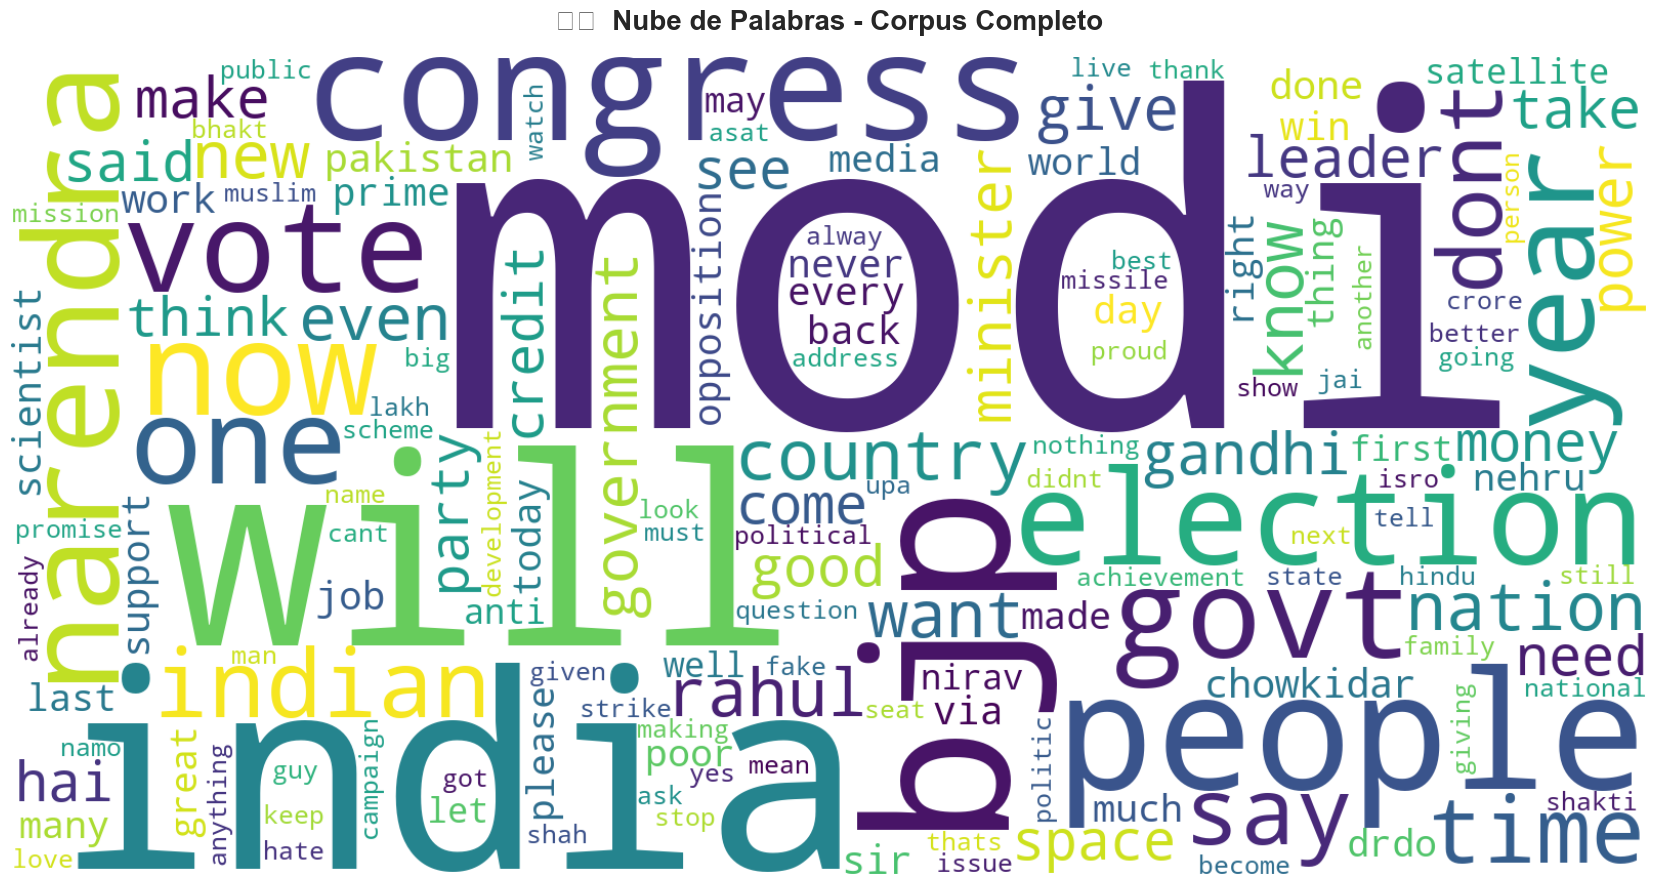

✅ Nube de palabras general creada


In [17]:
# 9.2 Nubes de Palabras

print("☁️  GENERANDO NUBES DE PALABRAS...")

all_text = ' '.join(all_tokens)

wordcloud = WordCloud(
    width=1600,
    height=800,
    background_color='white',
    colormap='viridis',
    max_words=150,
    relative_scaling=0.5,
    min_font_size=12,
    collocations=False
).generate(all_text)

plt.figure(figsize=(18, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('☁️  Nube de Palabras - Corpus Completo', fontsize=20, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('../reports/figures/wordcloud_full.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Nube de palabras general creada")

# -----
# Análisis Comparativo por Clase
# -----

🔍 ANÁLISIS DE PATRONES POR CLASE

📊 PROMEDIO DE ELEMENTOS ESPECIALES POR CLASE:


,urls,mentions,hashtags,numbers,punctuation,uppercase_words,emojis
class,,,,,,,
-1.0,0.0,0.0,0.0,0.16,0.0,0.0,0.27
0.0,0.0,0.0,0.0,0.13,0.0,0.0,0.25
1.0,0.0,0.0,0.0,0.15,0.0,0.0,0.29


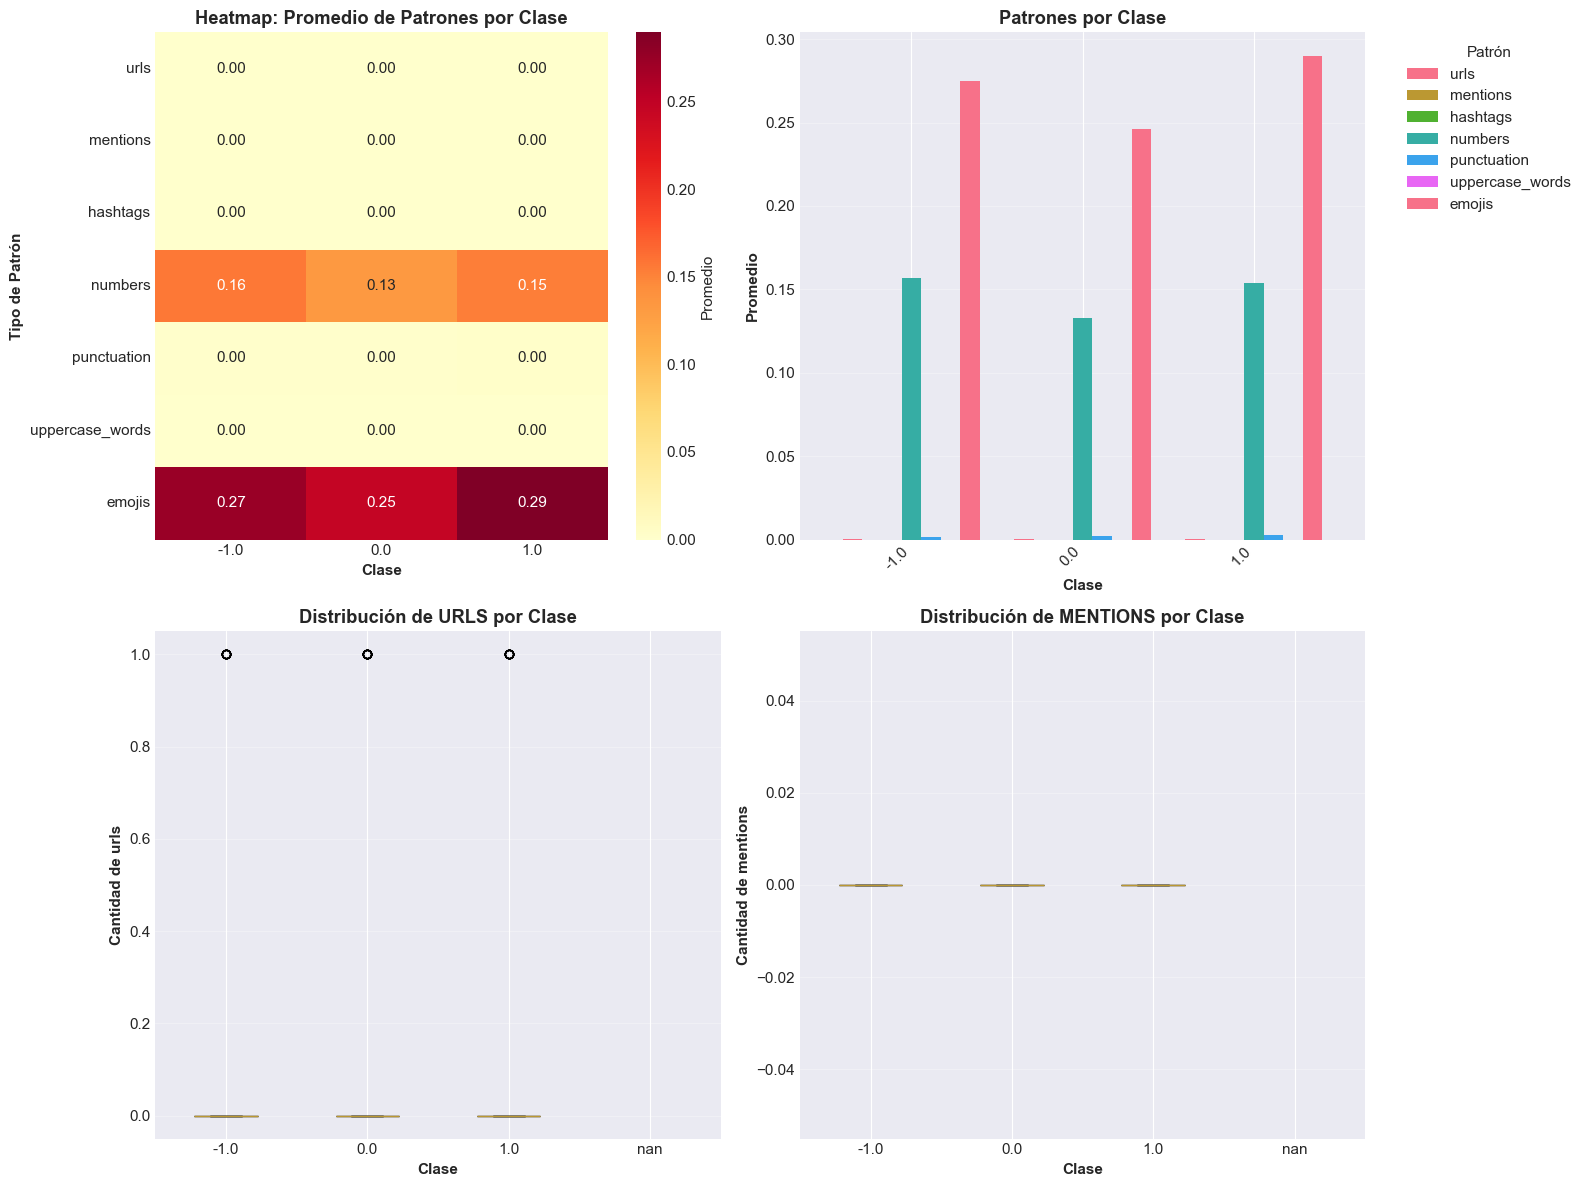

In [21]:
# 10.2 Patrones por Clase

# %%
print("🔍 ANÁLISIS DE PATRONES POR CLASE")
print("=" * 100)

# Añadir columna de clase al dataframe de patrones
pattern_df['class'] = df_clean[label_column].values

# Calcular promedios por clase
pattern_by_class = pattern_df.groupby('class').mean()

print("\n📊 PROMEDIO DE ELEMENTOS ESPECIALES POR CLASE:")
display(pattern_by_class.round(2))

# %%
# Visualización de patrones por clase
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Heatmap de patrones
pattern_cols = [col for col in pattern_df.columns if col != 'class']
sns.heatmap(pattern_by_class[pattern_cols].T, annot=True, fmt='.2f', cmap='YlOrRd', 
            ax=axes[0, 0], cbar_kws={'label': 'Promedio'})
axes[0, 0].set_xlabel('Clase', fontweight='bold')
axes[0, 0].set_ylabel('Tipo de Patrón', fontweight='bold')
axes[0, 0].set_title('Heatmap: Promedio de Patrones por Clase', fontweight='bold')

# Gráfica de barras agrupadas
pattern_by_class[pattern_cols].plot(kind='bar', ax=axes[0, 1], width=0.8)
axes[0, 1].set_xlabel('Clase', fontweight='bold')
axes[0, 1].set_ylabel('Promedio', fontweight='bold')
axes[0, 1].set_title('Patrones por Clase', fontweight='bold')
axes[0, 1].legend(title='Patrón', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0, 1].grid(True, alpha=0.3, axis='y')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45, ha='right')

# Análisis de URLs y menciones
for i, (col, ax) in enumerate(zip(['urls', 'mentions'], [axes[1, 0], axes[1, 1]])):
    data_to_plot = [pattern_df[pattern_df['class'] == label][col].values for label in unique_labels]
    bp = ax.boxplot(data_to_plot, labels=unique_labels, patch_artist=True)
    
    colors = sns.color_palette("Set2", len(unique_labels))
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
    
    ax.set_xlabel('Clase', fontweight='bold')
    ax.set_ylabel(f'Cantidad de {col}', fontweight='bold')
    ax.set_title(f'Distribución de {col.upper()} por Clase', fontweight='bold')
    ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('../reports/figures/patterns_by_class.png', dpi=300, bbox_inches='tight')
plt.show()

# -----
# Análisis de Calidad y Problemas Potenciales
# -----

In [24]:
print("🔍 DETECCIÓN DE PROBLEMAS POTENCIALES")
print("=" * 100)

# 1. Textos muy cortos
short_texts = df_clean[df_clean['text_length'] < 10]
print(f"\n⚠️  Textos muy cortos (< 10 caracteres): {len(short_texts):,} ({len(short_texts)/len(df_clean)*100:.2f}%)")
if len(short_texts) > 0:
    print("   Ejemplos:")
    for i, text in enumerate(short_texts[text_column].head(5), 1):
        print(f"   {i}. '{text}'")

# 2. Textos muy largos
long_texts = df_clean[df_clean['text_length'] > df_clean['text_length'].quantile(0.99)]
print(f"\n📏 Textos muy largos (> percentil 99): {len(long_texts):,}")
if len(long_texts) > 0:
    print(f"   Longitud máxima: {df_clean['text_length'].max()} caracteres")

# 3. Textos con muchos números
numeric_heavy = df_clean[pattern_df['numbers'].reindex(df_clean.index) > 5]
print(f"\n🔢 Textos con muchos números (> 5): {len(numeric_heavy):,} ({len(numeric_heavy)/len(df_clean)*100:.2f}%)")

# 4. Textos con muchas URLs
url_heavy = df_clean[pattern_df['urls'].reindex(df_clean.index) > 2]
print(f"\n🔗 Textos con muchas URLs (> 2): {len(url_heavy):,} ({len(url_heavy)/len(df_clean)*100:.2f}%)")

# 5. Textos sospechosos (casi sin letras)
suspicious = []
for idx, text in enumerate(df_clean[text_column]):
    alpha_ratio = sum(c.isalpha() for c in str(text)) / max(len(str(text)), 1)
    if alpha_ratio < 0.3 and df_clean.iloc[idx]['text_length'] > 10:
        suspicious.append(idx)

print(f"\n⚠️  Textos sospechosos (< 30% letras): {len(suspicious):,}")
if len(suspicious) > 0:
    print("   Ejemplos:")
    for i, idx in enumerate(suspicious[:3], 1):
        print(f"   {i}. '{df_clean.iloc[idx][text_column]}'")

# 6. Caracteres no ASCII
non_ascii = df_clean[df_clean[text_column].str.contains(r'[^\x00-\x7F]+', regex=True, na=False)]
print(f"\n🌐 Textos con caracteres no-ASCII: {len(non_ascii):,} ({len(non_ascii)/len(df_clean)*100:.2f}%)")

🔍 DETECCIÓN DE PROBLEMAS POTENCIALES

⚠️  Textos muy cortos (< 10 caracteres): 379 (0.23%)
   Ejemplos:
   1. 'song '
   2. 'modi for '
   3. 'only modi'
   4. 'did modi'
   5. 'ask modi'

📏 Textos muy largos (> percentil 99): 1,623
   Longitud máxima: 274 caracteres

🔢 Textos con muchos números (> 5): 127 (0.08%)

🔗 Textos con muchas URLs (> 2): 0 (0.00%)

⚠️  Textos sospechosos (< 30% letras): 4
   Ejemplos:
   1. '2014 won 2019 '
   2. '
1000000000000000true '
   3. '▬▬▬◙▬▬▬
═▂▄▄▓▄▄▂ ◢◤ █▀▀████▄▄▄▄◢◤ █▄ █ █▄ ███▀▀▀▀▀▀▀╬ ◥█████◤
══╩══╩═
╬═╬
╬═╬ ╬═╬ ╬═╬ ╬═╬ ╬═╬☻ ╬═╬▌ ╬═╬ \ just dropped down ╬═╬ say aayega modi '

🌐 Textos con caracteres no-ASCII: 19,844 (12.18%)


# -----
#  Resumen Ejecutivo del EDA
# -----

In [30]:
print("=" * 100)
print(" " * 30 + "📊 RESUMEN EJECUTIVO DEL EDA")
print("=" * 100)

print(f"\n🗂️  INFORMACIÓN DEL DATASET:")
print(f"  ├─ Total de registros: {len(df):,}")
print(f"  ├─ Registros válidos (sin nulos): {len(df_clean):,}")
print(f"  ├─ Registros duplicados: {duplicates:,} ({duplicate_percentage:.2f}%)")
print(f"  └─ Columnas: {len(df.columns)}")

print(f"\n📝 COLUMNAS PRINCIPALES:")
print(f"  ├─ Texto: '{text_column}'")
print(f"  └─ Etiquetas: '{label_column}'")

print(f"\n📊 ESTADÍSTICAS DE TEXTO:")
print(f"  ├─ Longitud promedio: {df_clean['text_length'].mean():.1f} caracteres")
print(f"  ├─ Palabras promedio: {df_clean['word_count'].mean():.1f} palabras")
print(f"  ├─ Longitud mínima: {df_clean['text_length'].min()} caracteres")
print(f"  └─ Longitud máxima: {df_clean['text_length'].max()} caracteres")

print(f"\n📚 VOCABULARIO:")
print(f"  ├─ Total de palabras: {total_words:,}")
print(f"  ├─ Palabras únicas: {vocab_size:,}")
print(f"  └─ Diversidad léxica: {lexical_diversity:.4f}")

print(f"\n🔍 ELEMENTOS ESPECIALES:")
for col in pattern_cols:
    pct = (pattern_df[col] > 0).mean() * 100
    print(f"  ├─ {col.capitalize()}: {pct:.1f}% de textos")

print(f"\n⚠️  PROBLEMAS DETECTADOS:")
issues = []
if duplicates > 0:
    issues.append(f"Duplicados: {duplicates:,} registros")
if len(short_texts) > 0:
    issues.append(f"Textos muy cortos: {len(short_texts):,} registros")
if len(suspicious) > 0:
    issues.append(f"Textos sospechosos: {len(suspicious):,} registros")

if issues:
    for issue in issues:
        print(f"  ├─ {issue}")
else:
    print("  └─ No se detectaron problemas críticos")

print(f"\n📝 RECOMENDACIONES PARA PREPROCESAMIENTO:")
print("  ├─ 1. Eliminar duplicados")
print("  ├─ 2. Limpiar URLs, menciones y hashtags")
print("  ├─ 3. Normalizar texto (minúsculas, puntuación)")
print("  ├─ 4. Eliminar stopwords")
print("  ├─ 5. Aplicar lematización")
if len(short_texts) / len(df_clean) > 0.01:
    print("  ├─ 6. Considerar eliminar textos muy cortos")
print("  └─ 8. Validar calidad final del dataset")

print("\n" + "=" * 100)

                              📊 RESUMEN EJECUTIVO DEL EDA

🗂️  INFORMACIÓN DEL DATASET:
  ├─ Total de registros: 162,980
  ├─ Registros válidos (sin nulos): 162,976
  ├─ Registros duplicados: 1 (0.00%)
  └─ Columnas: 2

📝 COLUMNAS PRINCIPALES:
  ├─ Texto: 'clean_text'
  └─ Etiquetas: 'category'

📊 ESTADÍSTICAS DE TEXTO:
  ├─ Longitud promedio: 124.2 caracteres
  ├─ Palabras promedio: 20.1 palabras
  ├─ Longitud mínima: 1 caracteres
  └─ Longitud máxima: 274 caracteres

📚 VOCABULARIO:
  ├─ Total de palabras: 3,230,327
  ├─ Palabras únicas: 101,274
  └─ Diversidad léxica: 0.0314

🔍 ELEMENTOS ESPECIALES:
  ├─ Urls: 0.0% de textos
  ├─ Mentions: 0.0% de textos
  ├─ Hashtags: 0.0% de textos
  ├─ Numbers: 10.9% de textos
  ├─ Punctuation: 0.2% de textos
  ├─ Uppercase_words: 0.0% de textos
  ├─ Emojis: 11.9% de textos

⚠️  PROBLEMAS DETECTADOS:
  ├─ Duplicados: 1 registros
  ├─ Textos muy cortos: 379 registros
  ├─ Textos sospechosos: 4 registros

📝 RECOMENDACIONES PARA PREPROCESAMIENTO:
  ├

# -----
# Exportar Estadísticas para el Informe
# -----

In [34]:
# Crear diccionario con todas las estadísticas
eda_stats = {
    'dataset_info': {
        'total_records': len(df),
        'valid_records': len(df_clean),
        'duplicates': int(duplicates),
        'duplicate_percentage': float(duplicate_percentage),
        'n_columns': len(df.columns),
        'text_column': text_column,
        'label_column': label_column
    },
    'text_statistics': {
        'avg_length_chars': float(df_clean['text_length'].mean()),
        'median_length_chars': float(df_clean['text_length'].median()),
        'std_length_chars': float(df_clean['text_length'].std()),
        'min_length_chars': int(df_clean['text_length'].min()),
        'max_length_chars': int(df_clean['text_length'].max()),
        'avg_word_count': float(df_clean['word_count'].mean()),
        'median_word_count': float(df_clean['word_count'].median()),
        'std_word_count': float(df_clean['word_count'].std()),
    },
    'vocabulary': {
        'total_words': int(total_words),
        'unique_words': int(vocab_size),
        'lexical_diversity': float(lexical_diversity),
        'top_10_words': [(word, int(count)) for word, count in most_common[:10]]
    },
    'patterns': {
        col: {
            'percentage_present': float((pattern_df[col] > 0).mean() * 100),
            'avg_when_present': float(pattern_df[pattern_df[col] > 0][col].mean()) if (pattern_df[col] > 0).sum() > 0 else 0
        } for col in pattern_cols
    },
    'quality_issues': {
        'short_texts': int(len(short_texts)),
        'long_texts': int(len(long_texts)),
        'suspicious_texts': int(len(suspicious)),
        'non_ascii_texts': int(len(non_ascii))
    }
}

# Guardar estadísticas en JSON
import json

output_path = Path('../reports/eda_statistics.json')
output_path.parent.mkdir(parents=True, exist_ok=True)

with open(output_path, 'w', encoding='utf-8') as f:
    json.dump(eda_stats, f, indent=2, ensure_ascii=False)

print(f"✅ Estadísticas exportadas a: {output_path}")

# También guardar el dataframe limpio para uso posterior
df_clean.to_csv('../data/twitter_data_clean.csv', index=False)
print(f"✅ Dataset limpio guardado en: ../data/twitter_data_clean.csv")

✅ Estadísticas exportadas a: ..\reports\eda_statistics.json
✅ Dataset limpio guardado en: ../data/twitter_data_clean.csv
